# Python - HW2
## Zheng Nan Yang

In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_data(exchange, token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

### Get the time series for the following cryptocurrencies from cryptowat.ch starting from 2021-11-22, hourly data

In [3]:
exchange_tokens = [('coinbase-pro','ETH'), ('coinbase-pro','SOL'), ('coinbase-pro', 'AVAX'), ('coinbase-pro','USDT'), ('kraken', 'FLOW')]

In [4]:
df = pd.concat(get_data(exchange, token) for exchange, token in exchange_tokens)

In [5]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH


In [6]:
df.count()

ts           2890
open         2890
high         2890
low          2890
close        2890
volume       2890
volumeUSD    2890
token        2890
dtype: int64

### Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [7]:
df.groupby('token')['volumeUSD'].sum().to_frame().sort_values('volumeUSD', ascending=False)

,volumeUSD
token,
ETH,2.277813e+10
SOL,7.443266e+09
AVAX,3.778711e+09
USDT,2.075803e+09
FLOW,9.076429e+07


### Add a column that calculates the close price ratio between ETH and SOL for each house (i.e. close price of ETH / close price of SOL for each period)

In [8]:
df['ratio_ETH_SOL'] = df[df['token'] == 'ETH']['close'] / df[df['token'] == 'SOL']['close']

In [9]:
#Setting the ratio to be NaN for the non ETH and SOL tokens since the ratio is not valuable for them
no_ratio_tokens = ['AVAX', 'USDT', 'FLOW']
df.loc[df['token'].isin(no_ratio_tokens), 'ratio_ETH_SOL'] = np.nan

In [10]:
#No ratio tokens
df[df['token'].isin(no_ratio_tokens)]

,ts,open,high,low,close,volume,volumeUSD,token,ratio_ETH_SOL
0,2021-11-22 00:00:00,131.690,133.790,127.700,128.670,96867.475000,1.267080e+07,AVAX,NaN
1,2021-11-22 01:00:00,128.760,135.290,126.250,134.850,147179.928000,1.915462e+07,AVAX,NaN
2,2021-11-22 02:00:00,134.810,136.870,129.920,132.540,141467.777000,1.887837e+07,AVAX,NaN
3,2021-11-22 03:00:00,132.380,133.930,129.450,133.380,83917.025000,1.106319e+07,AVAX,NaN
4,2021-11-22 04:00:00,133.460,137.500,132.160,136.290,138561.930000,1.878428e+07,AVAX,NaN
...,...,...,...,...,...,...,...,...,...
573,2021-12-15 21:00:00,8.681,8.897,8.681,8.865,30308.597382,2.675195e+05,FLOW,NaN
574,2021-12-15 22:00:00,8.869,8.908,8.851,8.873,3763.444420,3.339022e+04,FLOW,NaN
575,2021-12-15 23:00:00,8.892,8.914,8.800,8.817,4945.376851,4.379875e+04,FLOW,NaN
576,2021-12-16 00:00:00,8.851,8.857,8.810,8.838,6062.956373,5.354175e+04,FLOW,NaN


In [11]:
#Tokens with the close price ratio
df[df['token'].isin(['ETH', 'SOL'])]

,ts,open,high,low,close,volume,volumeUSD,token,ratio_ETH_SOL
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH,18.471694
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH,18.736150
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH,18.577985
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH,18.794937
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
573,2021-12-15 21:00:00,175.49,183.00,174.32,181.09,201230.037000,3.597575e+07,SOL,22.394942
574,2021-12-15 22:00:00,181.08,186.00,178.12,179.05,118687.216000,2.137551e+07,SOL,22.696956
575,2021-12-15 23:00:00,179.05,180.20,175.50,176.21,66629.799000,1.185980e+07,SOL,22.706600
576,2021-12-16 00:00:00,176.17,179.25,176.17,178.57,91584.408000,1.627515e+07,SOL,22.520748


### Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm

In [12]:
df.rename(
    columns={
        'volume':'volumeBase',
        'volumeUSD':'volumeTerm'
    },
    inplace = True
)

In [13]:
df

,ts,open,high,low,close,volumeBase,volumeTerm,token,ratio_ETH_SOL
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
573,2021-12-15 21:00:00,8.681,8.897,8.681,8.865,30308.597382,2.675195e+05,FLOW,NaN
574,2021-12-15 22:00:00,8.869,8.908,8.851,8.873,3763.444420,3.339022e+04,FLOW,NaN
575,2021-12-15 23:00:00,8.892,8.914,8.800,8.817,4945.376851,4.379875e+04,FLOW,NaN
576,2021-12-16 00:00:00,8.851,8.857,8.810,8.838,6062.956373,5.354175e+04,FLOW,NaN


### create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)

In [14]:
dfs = [get_data(exchange, token) for exchange, token in exchange_tokens]   
dfs = [df.set_index('ts') for df in dfs]

In [15]:
for i in range(len(dfs)):
    dfs[i] = dfs[i][['close']]
    dfs[i].rename(columns={'close': f'close_{exchange_tokens[i][1]}'}, inplace = True)

In [16]:
df_close_price = pd.concat(dfs, join='outer', axis=1)
df_close_price

,close_ETH,close_SOL,close_AVAX,close_USDT,close_FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-15 21:00:00,4055.50,181.090,103.27,1.0005,8.865
2021-12-15 22:00:00,4063.89,179.050,101.35,1.0003,8.873
2021-12-15 23:00:00,4001.13,176.210,100.15,1.0004,8.817


### calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))

In [17]:
df_returns = pd.DataFrame()
for _, token in exchange_tokens:
    df_returns[f'log_returns_{token}'] = np.log(df_close_price[f'close_{token}'] / df_close_price[f'close_{token}'].shift(1))

In [18]:
df_returns

,log_returns_ETH,log_returns_SOL,log_returns_AVAX,log_returns_USDT,log_returns_FLOW
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
...,...,...,...,...,...
2021-12-15 21:00:00,0.020804,0.031868,0.039403,0.0001,0.022819
2021-12-15 22:00:00,0.002067,-0.011329,-0.018767,-0.0002,0.000902
2021-12-15 23:00:00,-0.015564,-0.015989,-0.011911,0.0001,-0.006331


### [Stretch] calculate the correlation of the tokens using the table above

In [19]:
df_returns.corr()

,log_returns_ETH,log_returns_SOL,log_returns_AVAX,log_returns_USDT,log_returns_FLOW
log_returns_ETH,1.000000,0.750137,0.647144,-0.111153,0.575549
log_returns_SOL,0.750137,1.000000,0.630321,0.098692,0.467251
log_returns_AVAX,0.647144,0.630321,1.000000,-0.010022,0.398138
log_returns_USDT,-0.111153,0.098692,-0.010022,1.000000,-0.188333
log_returns_FLOW,0.575549,0.467251,0.398138,-0.188333,1.000000


### [Stretch] visualize the correlation in a matplpotlib plot

<AxesSubplot:>

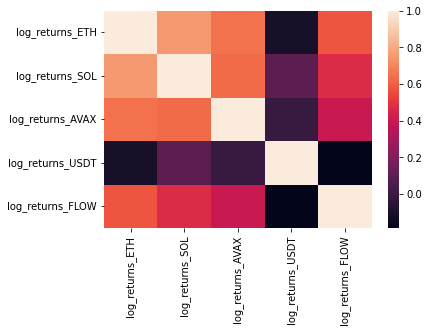

In [20]:
sns.heatmap(df_returns.corr())